## Estadistica Aplicada
3er parcial

Estadística aplicada

Francisco Javier Chávez Hernández 2034204

Gpo 44

5 de noviembre

In [55]:
#librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
#especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_predict

#ARIMA
from statsmodels.tsa.arima.model import ARIMA
#pmdarima 
import pmdarima as pm

In [57]:
plt.rcParams['figure.figsize']=(10,6)

In [58]:
#datos
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/datos_metrorrey.csv')

In [59]:
pasajeros.head()

,mes,miles de pasajeros,ingresos (miles de pesos)
0,1995/01,3439.0,3240.0
1,1995/02,2879.0,3623.0
2,1995/03,3103.0,3990.0
3,1995/04,3491.0,3321.0
4,1995/05,3109.0,3777.0


# 1. Muestre de que tipo son las variables del dataframe, revise que no haya missing values (de haberlos imputar valores). Cersiorarse que exista una variable fecha, que sea el index y tenga una frecuencia asignada (1.8 puntos)

In [60]:
pasajeros.dtypes

mes                           object
miles de pasajeros           float64
ingresos (miles de pesos)    float64
dtype: object

In [61]:
pasajeros.isnull().sum()

mes                          0
miles de pasajeros           0
ingresos (miles de pesos)    0
dtype: int64

In [62]:
#formato fecha, index, frecuencia
pasajeros['mes']=pd.to_datetime(pasajeros['mes'], format='%Y/%m')
pasajeros=pasajeros.set_index('mes')
pasajeros=pasajeros.asfreq('MS')

# 2. Análisis exploratorio. Utilizando código de Python genera un print() para cada una de la siguiente información (8 puntos):
* a) Rango de fechas
* b) Número de observaciones1
* c) Valor mínimo y valor máximo del número de pasajero

In [63]:
pasajeros.head(2)

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0


In [64]:
#a) Rango de fechas
pasajeros.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01'],
              dtype='datetime64[ns]', name='mes', length=344, freq='MS')

In [65]:
print('El rango de fechas de la base de datos de Metrorey es desde',pasajeros.index[0],'hasta', pasajeros.index[-1])

El rango de fechas de la base de datos de Metrorey es desde 1995-01-01 00:00:00 hasta 2023-08-01 00:00:00


In [66]:
#b) Número de observaciones
print('Los elementos observados son:',pasajeros.reset_index()['mes'].count())

Los elementos observados son: 344


In [67]:
pasajeros.head(2)
#sigue estando el index activo

,miles de pasajeros,ingresos (miles de pesos)
mes,,
1995-01-01,3439.0,3240.0
1995-02-01,2879.0,3623.0


In [68]:
#c) Valor mínimo y valor máximo del número de pasajero
print('El valor minimo de pasajeros en este periodo fue de:',pasajeros['miles de pasajeros'].min(), 'mientras que el valor máximo fue de:',pasajeros['miles de pasajeros'].max())


El valor minimo de pasajeros en este periodo fue de: 2397.0 mientras que el valor máximo fue de: 17534.523


# 3. Grafica lo siguiente (8.2 puntos):

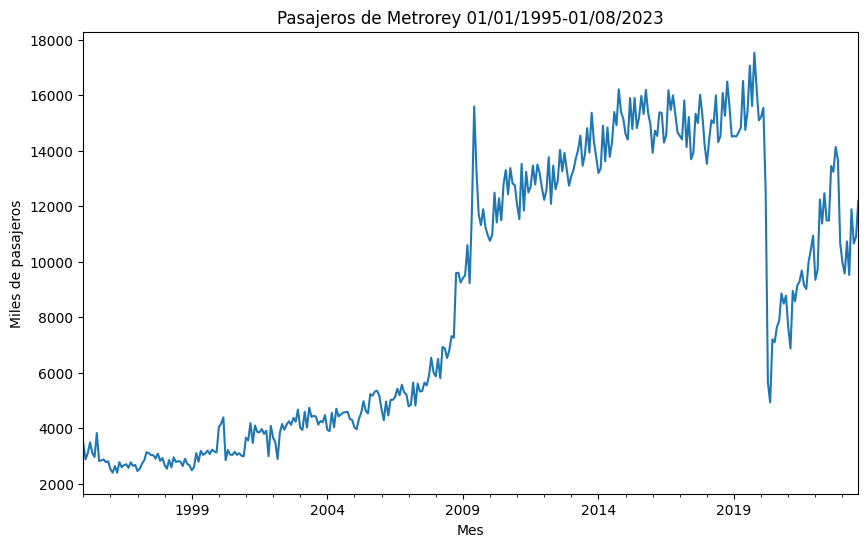

In [69]:
#a) La serie de miles de pasajeros
pasajeros['miles de pasajeros'].plot()
plt.xlabel('Mes')
plt.ylabel('Miles de pasajeros')
plt.title('Pasajeros de Metrorey 01/01/1995-01/08/2023');

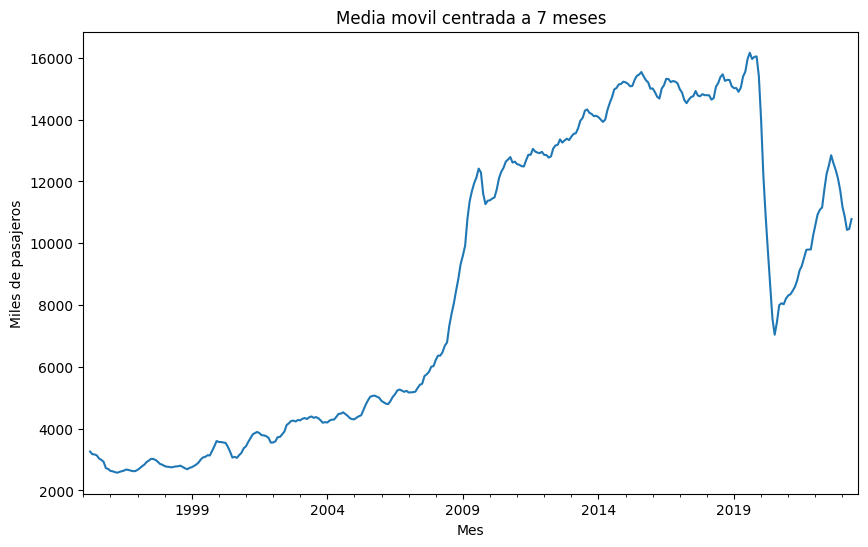

In [70]:
#b) Una media móvil centrada a 7 meses, y explica si la serie tiene tendencia o no, y si existen ciclos (subidas y caídas) y que se debe cada uno.
pasajeros['PMS-7']=pasajeros['miles de pasajeros'].rolling(7, center=True).mean().plot()
plt.title('Media movil centrada a 7 meses')
plt.xlabel('Mes')
plt.ylabel('Miles de pasajeros');

* La serie tiene tendencia creciente ya que con el tiempo hay más habitantes en la zona metropolitana de Monterrey por lo cual la cantidad de usuarios naturalmente van a subir.
* Hablando de cíclos, podemos identificar fácilmente 3: 

$1)$ En 2009 hubo un crecimiento significativo, esto debido a la ampliación de la línea 2 para comunicar a San Nicolas con Monterrey

$2)$ En 2020 tuvo una caída extrema por la pandemia de covid al retomar actividades volvió a tener esa tendencia creciente

$3)$ En 2022 una vez más tuvo una caída debido a los trabajos de remodelación/restauración que tuvo el metro.

# 4. El director de Metrorrey planea hacer mantenimiento a las estaciones y los vagones, pero no sabe la fecha adecuada para hacerlo. Utiliza el modelo ETS para obtener el componente estacional de la serie y señala el mes o meses adecuados para dar mantenimiento (8.2 puntos).

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [72]:
ets=seasonal_decompose(pasajeros['miles de pasajeros'],model='mul')

(300.0, 643.0)

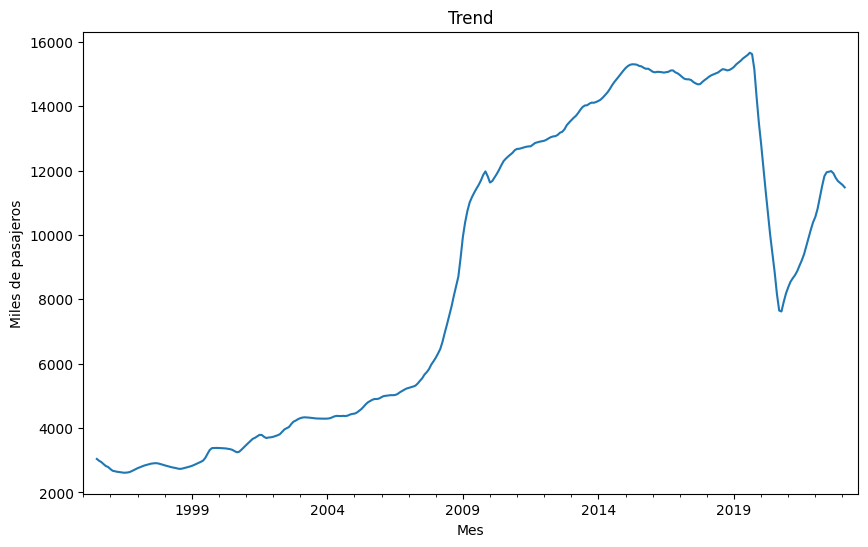

In [73]:
ets.trend.plot()
plt.xlabel('Mes')
plt.ylabel('Miles de pasajeros')
plt.title('Trend')
plt.xlim('1995-01-01','2023-08-01')

(612.0, 643.0)

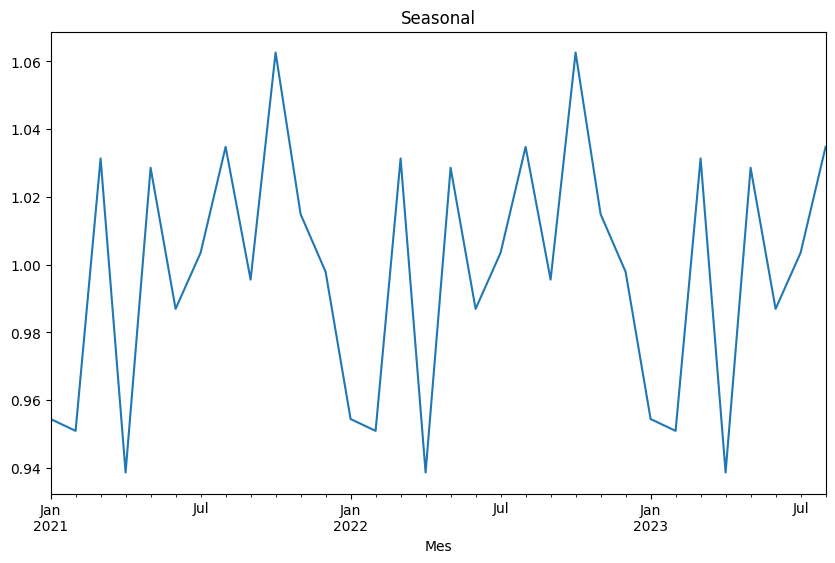

In [74]:
ets.seasonal.plot()
plt.xlabel('Mes')
plt.title('Seasonal')
plt.xlim('2021-01-01','2023-08-01')

Pareciera que el factor estacional indica que el mes cuando hay menos usuarios, el cual sería el mejor mes para realizar mantenimiento a los vagones y estaciones es en Abril, y depués en Febrero o en Enero

# 5. El director de Metrorrey quiere saber los ingresos por pasaje y el número de pasajeros los siguientes 5 meses. Utiliza el método de Holt-Winters para pronosticar el número de pasajeros los próximos 5 meses, cada pronóstico multiplícalo por $7.1 para tener un estimado de los ingresos (8.2 puntos).

In [75]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [76]:
pasajeros['HoltWinters']=ExponentialSmoothing(pasajeros['miles de pasajeros'], trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


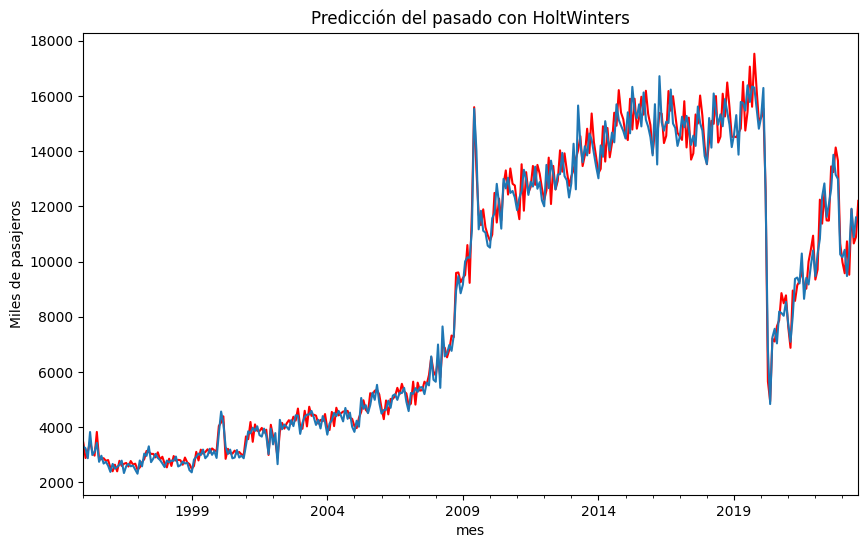

In [77]:
pasajeros['miles de pasajeros'].plot(color='red')
pasajeros['HoltWinters'].plot();
plt.ylabel('Miles de pasajeros')
plt.title('Predicción del pasado con HoltWinters');

In [78]:
holtwinters_model=ExponentialSmoothing(pasajeros['miles de pasajeros'],trend='add',seasonal='mul',seasonal_periods=12).fit()

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [79]:
## pronostico de pasajeros los siguientes dos años
pronostico_metro=holtwinters_model.forecast(6)

(540.0, 651.0)

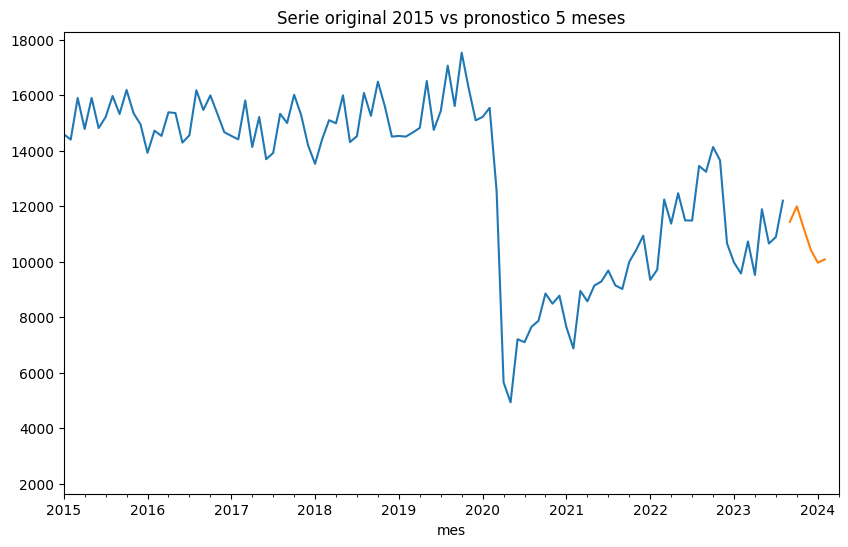

In [80]:
pasajeros['miles de pasajeros'].plot()
pronostico_metro.plot()
plt.title('Serie original 2015 vs pronostico 5 meses')
plt.xlim('2015-01-01','2024-04-01')

In [81]:
pronostico_metro

2023-09-01    11441.185911
2023-10-01    11998.364287
2023-11-01    11200.851863
2023-12-01    10433.610889
2024-01-01     9967.179612
2024-02-01    10085.149081
Freq: MS, dtype: float64

In [82]:
pronostico5m=pd.DataFrame(pronostico_metro, columns=['Miles de Pasajeros esperados']).round()
pronostico5m['$ Ingresos espeados']=(7.1*pronostico5m['Miles de Pasajeros esperados']).round()
pronostico5m

,Miles de Pasajeros esperados,$ Ingresos espeados
2023-09-01,11441.0,81231.0
2023-10-01,11998.0,85186.0
2023-11-01,11201.0,79527.0
2023-12-01,10434.0,74081.0
2024-01-01,9967.0,70766.0
2024-02-01,10085.0,71604.0


# 6. Realiza un pronóstico de los miles de pasajeros con el modelo ARIMA cumpliendo los siguientes pasos

In [83]:
#a) Realiza una prueba de raíz unitaria a la serie original (8.2 puntos)
prueba_adf=adfuller(pasajeros['miles de pasajeros'])
pvalue=prueba_adf[1]
pvalue.round(2)

0.58

No rechazamos Ho, significa que la serie de miles de pasajeros no es una serie estacionaria

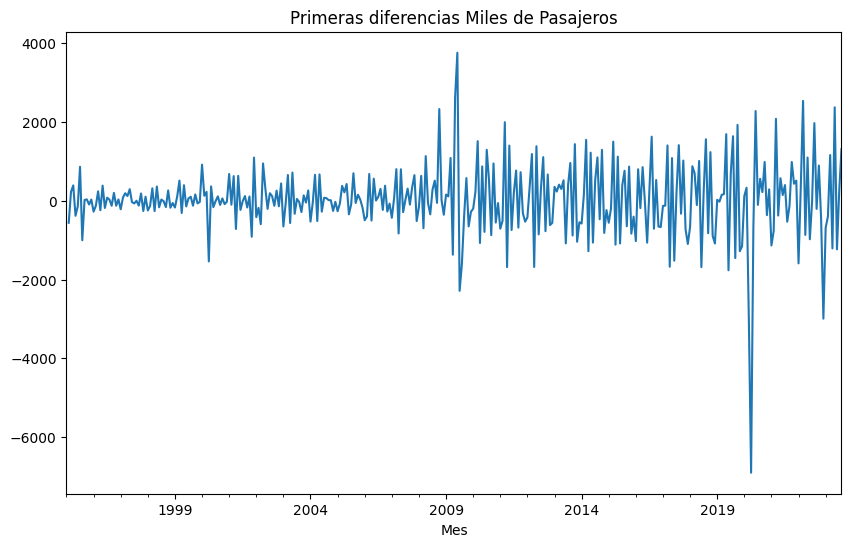

In [84]:
#b) En caso de que no sea estacionaria aplica primeras diferencias, y realiza la prueba de raíz unitaria para verificar que la serie
# sea estacionaria (8.2 puntos)
pasajeros['milespasajeros_dif']=pasajeros['miles de pasajeros'].diff()
pasajeros['milespasajeros_dif'].plot()
plt.title('Primeras diferencias Miles de Pasajeros')
plt.xlabel('Mes');

In [85]:
prueba_adf1=adfuller(pasajeros['milespasajeros_dif'].dropna())
pvalue1=prueba_adf1[1]
pvalue1.round(4)

0.0003

Rechazamos Ho, significa que las primeras diferencias de miles de pasajeros es un proceso estacionario

In [86]:
# c) Si la serie no es estacionaria repite el paso b hasta que la serie sea estacionaria.

* Miles de pasajeros I(1)
* 1ras diferencias de miles de pasajeros integrado I(0)

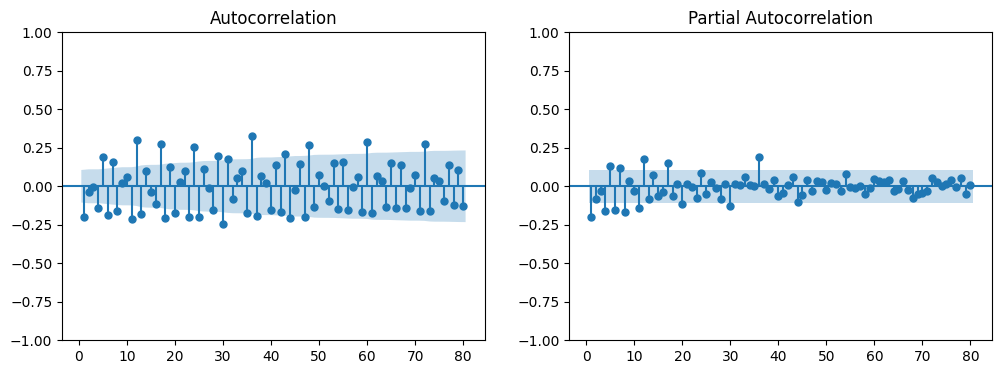

In [87]:
# d) Realiza las graficas de autocorrelación de la serie estacionaria para verificar si la serie tiene o no un componente estacional (8.2 puntos)
ig, ax=plt.subplots(1,2,figsize=(12,4))
#1er subgrafica
plot_acf(pasajeros['milespasajeros_dif'].dropna(),zero=False, lags=80, ax=ax[0])
#2da
plot_pacf(pasajeros['milespasajeros_dif'].dropna(),zero=False, lags=80, ax=ax[1])
plt.show()

Tuve que meterle mas lags porque con menos no se apreciaba un patron reconocible, con 80 aparentemente se puede ver uno que sería cada 12 meses, se puede apreciar mejor a partir del rezago 36. Por lo que se podría decir que es una serie con componente estacional 

In [88]:
#e) Utiliza auto_arima para encontrar el orden del modelo arima, dando el parámetro information_criterion prueba y muestra el resultado, con aic, 
# bic, hqic, oob, en caso de que resulten diferente elegir aic si tu matricula termina en par, sino termina en par elegir uno distinto a aic.

pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10, max_q=10,
              ic='aic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [89]:
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10, max_q=10,
              ic='bic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [90]:
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10, max_q=10,
              ic='hqic',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [91]:
pm.auto_arima(pasajeros['miles de pasajeros'],
              start_p=1,start_q=1,
              max_p=10, max_q=10,
              ic='oob',
              seasonal=True,
              m=12,
              start_P=1, start_Q=1,
              max_P=7, max_Q=7)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

Con todos los information_criterion arrojó el mismo orden de ARIMA que es un ARIMA (1,1,3)(1,0,1,12)

In [92]:
# f)  Con el orden del modelo arima obtenido estima el modelo arima (8.2 puntos)
model=ARIMA(pasajeros['miles de pasajeros'], 
            order=(1,1,3),
            seasonal_order=(1,0,1,12))
results=model.fit()
print(results.summary())

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                 miles de pasajeros   No. Observations:                  344
Model:             ARIMA(1, 1, 3)x(1, 0, [1], 12)   Log Likelihood               -2772.710
Date:                            Sun, 05 Nov 2023   AIC                           5559.420
Time:                                    16:12:18   BIC                           5586.284
Sample:                                01-01-1995   HQIC                          5570.121
                                     - 08-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9500      0.039    -24.400      0.000      -1.026      -0.874
ma.L1          0.9122      0.052   

C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
#g) Realiza la gráfica del pronóstico a 5 meses con los intervalos de confianza y la serie original desde 2021 (8.2 puntos)
#pronosticando el pasado
pasajeros['miles de pasajeros_arima']=results.predict()

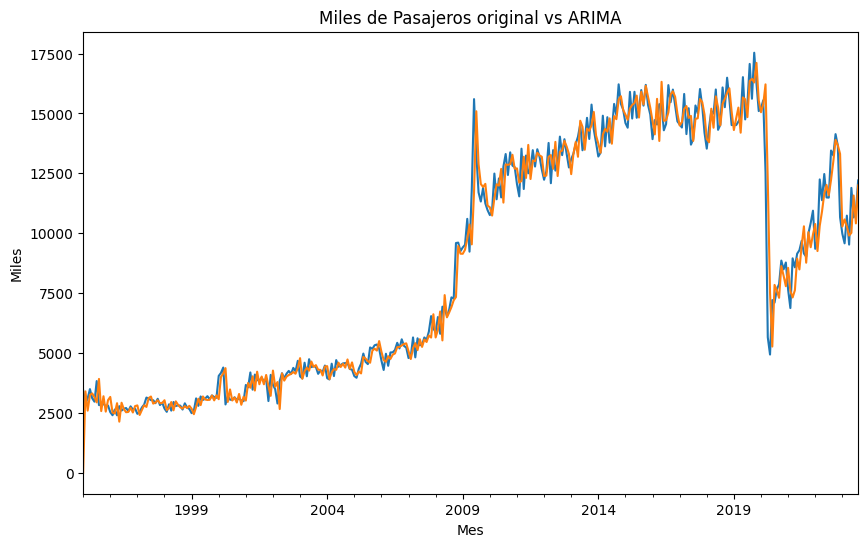

In [94]:
pasajeros['miles de pasajeros'].plot()
pasajeros['miles de pasajeros_arima'].plot()
plt.title('Miles de Pasajeros original vs ARIMA')
plt.xlabel('Mes')
plt.ylabel('Miles');

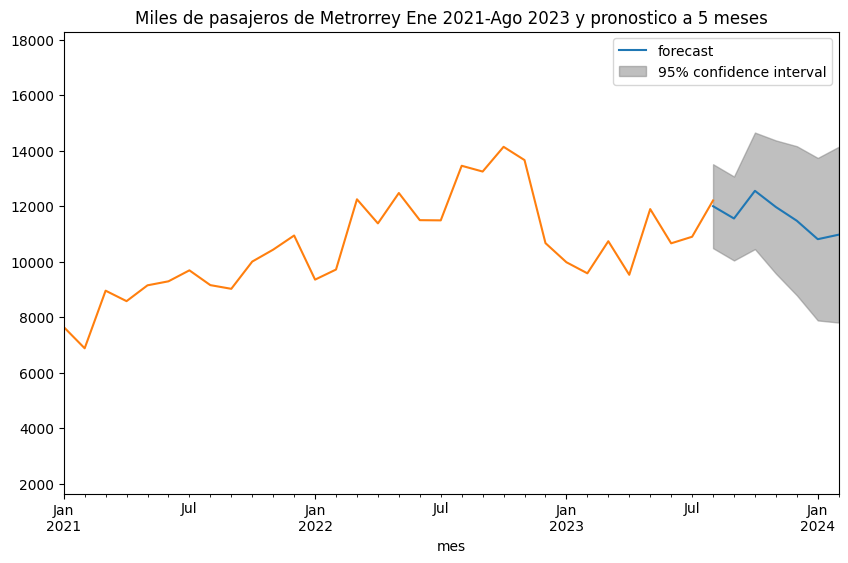

In [95]:
plot_predict(results,'2023-08-01','2024-02-01')
pasajeros['miles de pasajeros'].plot()
plt.title('Miles de pasajeros de Metrorrey Ene 2021-Ago 2023 y pronostico a 5 meses')
plt.xlim('2021-01-01','2024-02-01')
plt.show()

In [96]:
#h) Realiza el pronostico a 5 meses con los intervalos de confianza (8.2 puntos)
pasajeros.tail(5)

,miles de pasajeros,ingresos (miles de pesos),PMS-7,HoltWinters,milespasajeros_dif,miles de pasajeros_arima
mes,,,,,,
2023-04-01,9523.669,38799.657,"Axes(0.125,0.11;0.775x0.77)",10332.041570,-1210.233,9901.413568
2023-05-01,11891.646,58511.798,"Axes(0.125,0.11;0.775x0.77)",11915.834680,2367.977,10015.581285
2023-06-01,10657.712,55684.063,"Axes(0.125,0.11;0.775x0.77)",10886.625086,-1233.934,11574.881447
2023-07-01,10894.497,56378.304,"Axes(0.125,0.11;0.775x0.77)",11599.261765,236.785,10408.660676
2023-08-01,12201.982,57821.901,"Axes(0.125,0.11;0.775x0.77)",NaN,1307.485,11995.847293


In [97]:
#quité las columnas que debí haber puesto en otro data frame o simplemente para visualizar solo las que se necesiten para el pronostico
pasajeros.drop(['PMS-7','HoltWinters',],axis=1)


,miles de pasajeros,ingresos (miles de pesos),milespasajeros_dif,miles de pasajeros_arima
mes,,,,
1995-01-01,3439.000,3240.000,NaN,0.000000
1995-02-01,2879.000,3623.000,-560.000,3396.237001
1995-03-01,3103.000,3990.000,224.000,2591.422950
1995-04-01,3491.000,3321.000,388.000,3241.626311
1995-05-01,3109.000,3777.000,-382.000,3311.553500
...,...,...,...,...
2023-04-01,9523.669,38799.657,-1210.233,9901.413568
2023-05-01,11891.646,58511.798,2367.977,10015.581285
2023-06-01,10657.712,55684.063,-1233.934,11574.881447


In [98]:
forecast=results.get_forecast(steps=5)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

In [99]:
inicio='2023-09-01'
fin='2024-01-01'

In [100]:
pronostico_valor=forecast_mean[inicio:fin]

In [101]:
pronostico_intervalos=forecast_ci.loc[inicio:fin]

In [102]:
#dataframe
df_forecast=pd.DataFrame({
'pronostico':pronostico_valor,
'limite inferior':pronostico_intervalos.iloc[:,0],
'limite superior':pronostico_intervalos.iloc[:,1]
})

In [103]:
pronostico_intervalos

,lower miles de pasajeros,upper miles de pasajeros
2023-09-01,10039.999939,13065.702754
2023-10-01,10449.922845,14648.750529
2023-11-01,9566.530272,14365.639042
2023-12-01,8784.049680,14157.378273
2024-01-01,7878.594200,13734.834031


In [104]:
df_forecast

,pronostico,limite inferior,limite superior
2023-09-01,11552.851347,10039.999939,13065.702754
2023-10-01,12549.336687,10449.922845,14648.750529
2023-11-01,11966.084657,9566.530272,14365.639042
2023-12-01,11470.713977,8784.049680,14157.378273
2024-01-01,10806.714116,7878.594200,13734.834031


In [105]:
#i) Calcula los ingresos y el intervalo de los ingresos multiplicando por $7.1(8.2 puntos)
ingresos_forecast=df_forecast*7.1
ingresos_forecast

,pronostico,limite inferior,limite superior
2023-09-01,82025.244561,71283.999569,92766.489553
2023-10-01,89100.290480,74194.452201,104006.128758
2023-11-01,84959.201064,67922.364932,101996.037195
2023-12-01,81442.069234,62366.752729,100517.385739
2024-01-01,76727.670221,55938.018819,97517.321622
